In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gq-implied-volatility-forecasting/train/ETH.csv')
df["breadth"] = df["bid_price1"] - df["ask_price1"]
'''plt.plot(df['breadth'], df['label'])
plt.title('Implied Volatility Over Time')
plt.xlabel('Breadth')
plt.ylabel('Implied Volatility')
plt.show()'''

"plt.plot(df['breadth'], df['label'])\nplt.title('Implied Volatility Over Time')\nplt.xlabel('Breadth')\nplt.ylabel('Implied Volatility')\nplt.show()"

In [2]:
df = pd.read_csv('gq-implied-volatility-forecasting/train/ETH.csv')
df["breadth"] = df["bid_price1"] - df["ask_price1"]
correlation = df['breadth'].corr(df['label'])
print(f"Correlation between breadth and implied volatility: {correlation}")

Correlation between breadth and implied volatility: -0.0010195280536707786


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr

# Example: assuming your data is in a pandas DataFrame 'df'
# with columns 'spread' and 'implied_vol'

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df['breadth'], df['label'])
print(df['breadth'].head())
print(df['label'].head())  # Display the first few rows of the label column
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")
# Spearman correlation
spearman_corr, spearman_p = spearmanr(df['breadth'], df['label'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

0   -0.01
1   -0.01
2   -0.01
3   -0.01
4   -0.01
Name: breadth, dtype: float64
0    0.000060
1    0.000057
2    0.000080
3    0.000087
4    0.000090
Name: label, dtype: float64
Pearson correlation: nan, p-value: nan
Spearman correlation: nan, p-value: nan


In [5]:
df_clean = df[['breadth','label']].dropna()
df_clean['breadth'] = df_clean['breadth'].astype(float)
df_clean['label'] = df_clean['label'].astype(float)
pearson_corr, pearson_p = pearsonr(df_clean['breadth'], df_clean['label'])
print(f"Pearson correlation after cleaning: {pearson_corr}, p-value: {pearson_p}")
# Spearman correlation after cleaning
spearman_corr, spearman_p = spearmanr(df_clean['breadth'], df_clean['label'])
print(f"Spearman correlation after cleaning: {spearman_corr}, p-value: {spearman_p}")



Pearson correlation after cleaning: -0.001019528053670784, p-value: 0.4313041410976104
Spearman correlation after cleaning: 0.00636103721429722, p-value: 9.104868165134647e-07


In [6]:
pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figvolume=(8,6))
sns.scatterplot(x='label', y='breadth', data=df_clean, alpha=0.3)
sns.regplot(x='label', y='breadth', data=df_clean, scatter=False, lowess=True, color='red')
plt.title("Breadth vs Implied Volatility with LOWESS smoothing")
plt.show()


AttributeError: Figure.set() got an unexpected keyword argument 'figvolume'

In [ ]:
print(df_clean['breadth'].describe())
print(df_clean['breadth'].head(20))


count    5.958140e+05
mean    -8.376444e+33
std      6.465693e+36
min     -4.990803e+39
25%     -1.000000e-02
50%     -1.000000e-02
75%     -1.000000e-02
max     -1.000000e-02
Name: breadth, dtype: float64
0    -0.01
1    -0.01
2    -0.01
3    -0.01
4    -0.01
5    -0.01
6    -0.01
7    -0.01
8    -0.01
9    -0.01
10   -0.01
11   -0.01
12   -0.01
13   -0.01
14   -0.01
15   -0.01
16   -0.01
17   -0.01
18   -0.01
19   -0.01
Name: breadth, dtype: float64


In [ ]:
import pandas as pd
dff = pd.read_csv('gq-implied-volatility-forecasting/train/ETH.csv')
dff = dff.dropna()
dff["spread"] = dff["ask_price1"] - dff["bid_price1"]
print(dff['spread'].describe())

count    5.958140e+05
mean     8.376444e+33
std      6.465693e+36
min      1.000000e-02
25%      1.000000e-02
50%      1.000000e-02
75%      1.000000e-02
max      4.990803e+39
Name: spread, dtype: float64


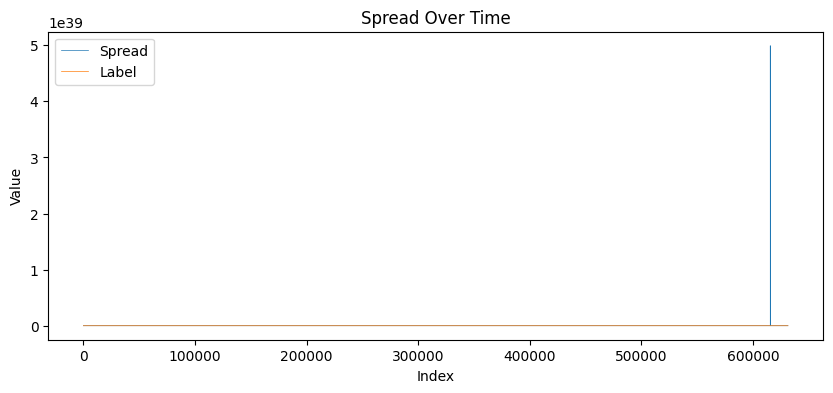

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(dff["spread"], linewidth=0.5)
plt.plot((dff["label"]*500), linewidth=0.5)
plt.title("Spread Over Time")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(["Spread", "Label"])
plt.show()

In [ ]:
max_idx = dff['spread'].idxmax()
dff = dff.drop(index=max_idx)
print(dff.head())

             timestamp  mid_price  bid_price1  bid_volume1  bid_price2  \
0  2024-09-25 18:13:28   2581.605     2581.60       2980.3     2581.59   
1  2024-09-25 18:13:29   2581.285     2581.28       1400.6     2581.22   
2  2024-09-25 18:13:30   2581.285     2581.28        875.2     2581.22   
3  2024-09-25 18:13:31   2581.105     2581.10       1980.0     2581.09   
4  2024-09-25 18:13:32   2581.105     2581.10       1995.5     2581.09   

   bid_volume2  bid_price3  bid_volume3  bid_price4  bid_volume4  ...  \
0         44.8     2581.56        139.1     2581.54         86.3  ...   
1          7.8     2581.19          5.0     2581.18         67.1  ...   
2          7.8     2581.20         64.2     2581.19          5.0  ...   
3        508.4     2581.08          0.2     2581.05         18.7  ...   
4        508.4     2581.08          0.2     2581.05         18.7  ...   

   ask_price2  ask_volume2  ask_price3  ask_volume3  ask_price4  ask_volume4  \
0     2581.67          9.2     2581.

In [ ]:
print(dff['spread'].describe())

count    595813.000000
mean          0.010105
std           0.007458
min           0.010000
25%           0.010000
50%           0.010000
75%           0.010000
max           2.270000
Name: spread, dtype: float64


In [ ]:
import pandas as pd

dff['iv_decile'] = pd.qcut(dff['label'], q=10, labels=False, duplicates='drop')

spread_summary = dff.groupby('iv_decile')['spread'].agg(['mean','median','std','count']).reset_index()


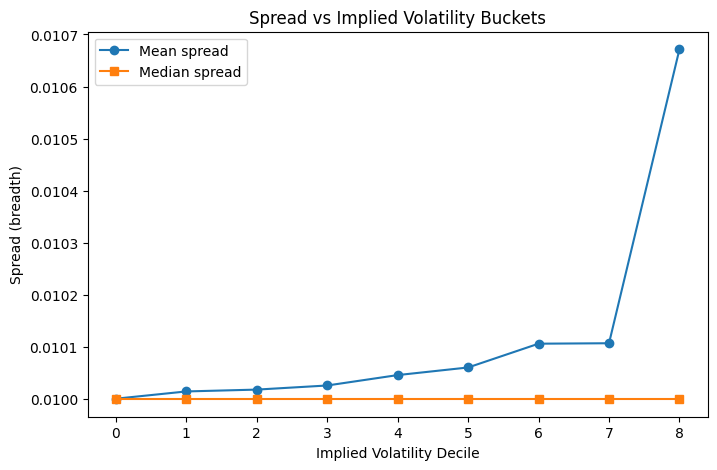

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figvolume=(8,5))
plt.plot(spread_summary['iv_decile'], spread_summary['mean'], marker='o', label='Mean spread')
plt.plot(spread_summary['iv_decile'], spread_summary['median'], marker='s', label='Median spread')
plt.xlabel("Implied Volatility Decile")
plt.ylabel("Spread (breadth)")
plt.title("Spread vs Implied Volatility Buckets")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import spearmanr, pearsonr
dff["shift_spread"] = dff["spread"].shift(10)
dff_clean = dff.dropna(subset=["shift_spread", "label"])
pearson_corr, pearson_p = pearsonr(dff_clean['spread'], dff_clean['label'])
print(f"Pearson correlation after cleaning: {pearson_corr}, p-value: {pearson_p}")
# Spearman correlation after cleaning
spearman_corr, spearman_p = spearmanr(dff_clean['shift_spread'], dff_clean['label'])
print(f"Spearman correlation after cleaning: {spearman_corr}, p-value: {spearman_p}")

Pearson correlation after cleaning: 0.04392370716191149, p-value: 3.350323117482553e-252
Spearman correlation after cleaning: -0.0019277299600610005, p-value: 0.13675622385636155


In [ ]:
import numpy as np
from scipy import stats

# Define low IV group (bottom 10%) and high IV group (top 10%)
low_iv_threshold = np.percentile(dff['iv_decile'], 10)
high_iv_threshold = np.percentile(dff['iv_decile'], 90)

low_iv_group = dff[dff['iv_decile'] <= low_iv_threshold]['spread']
high_iv_group = dff[dff['iv_decile'] >= high_iv_threshold]['spread']

# Welch’s t-test
t_stat, p_value = stats.ttest_ind(low_iv_group, high_iv_group, equal_var=False)

print(f"T-statistic: {t_stat}, p-value: {p_value}")
print(f"Mean spread (low IV): {low_iv_group.mean()}")
print(f"Mean spread (high IV): {high_iv_group.mean()}")


T-statistic: -7.663498100203676, p-value: 1.8366121951297633e-14
Mean spread (low IV): 0.010001007024010744
Mean spread (high IV): 0.010671679366261087


In [ ]:

import pandas as pd
import numpy as np

def flag_weird_all_cols(df, window=50, threshold=10):
    """
    For every numeric column in df, compute rolling z-score.
    Flag rows where any column exceeds the threshold.
    """
    df_out = df.copy()
    num_cols = df_out.select_dtypes(include=[np.number]).columns

    weird_flags = pd.DataFrame(False, index=df_out.index, columns=num_cols)

    for col in num_cols:
        roll_mean = df_out[col].rolling(window, min_periods=10).mean()
        roll_std  = df_out[col].rolling(window, min_periods=10).std()

        z = (df_out[col] - roll_mean) / roll_std
        df_out[f"{col}_zscore"] = z
        weird_flags[col] = z.abs() > threshold

    # master flag: True if any column is weird
    df_out["weird_flag"] = weird_flags.any(axis=1)
    return df_out

# Example
df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df_checked = flag_weird_all_cols(df, window=50, threshold=5)


In [ ]:
print(df_checked[df_checked['weird_flag']])  # Display rows flagged as weird

Empty DataFrame
Columns: [timestamp, mid_price, bid_price1, bid_volume1, bid_price2, bid_volume2, bid_price3, bid_volume3, bid_price4, bid_volume4, bid_price5, bid_volume5, ask_price1, ask_volume1, ask_price2, ask_volume2, ask_price3, ask_volume3, ask_price4, ask_volume4, ask_price5, ask_volume5, label, mid_price_zscore, bid_price1_zscore, bid_volume1_zscore, bid_price2_zscore, bid_volume2_zscore, bid_price3_zscore, bid_volume3_zscore, bid_price4_zscore, bid_volume4_zscore, bid_price5_zscore, bid_volume5_zscore, ask_price1_zscore, ask_volume1_zscore, ask_price2_zscore, ask_volume2_zscore, ask_price3_zscore, ask_volume3_zscore, ask_price4_zscore, ask_volume4_zscore, ask_price5_zscore, ask_volume5_zscore, label_zscore, weird_flag]
Index: []

[0 rows x 46 columns]


In [ ]:
print(np.volume(df_checked[df_checked['weird_flag']]))

0


In [ ]:

import pandas as pd
import numpy as np

def flag_weird_all_cols(df, window=50, threshold=10):
    """
    For every numeric column in df, compute rolling z-score.
    Flag rows where any column exceeds the threshold.
    """
    df_out = df.copy()
    num_cols = df_out.select_dtypes(include=[np.number]).columns

    weird_flags = pd.DataFrame(False, index=df_out.index, columns=num_cols)

    for col in num_cols:
        roll_mean = df_out[col].rolling(window, min_periods=10).mean()
        roll_std  = df_out[col].rolling(window, min_periods=10).std()

        z = (df_out[col] - roll_mean) / roll_std
        df_out[f"{col}_zscore"] = z
        weird_flags[col] = z.abs() > threshold

    # master flag: True if any column is weird
    df_out["weird_flag"] = weird_flags.any(axis=1)
    return df_out

# Example
df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df_checker = df.dropna()
df_checked = flag_weird_all_cols(df_checker, window=50, threshold=10)


In [ ]:
df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df_checker = df.dropna()

In [ ]:
print(f"Size of df_checker: {df_checker.shape}")

Size of df_checker: (595814, 23)


In [ ]:
print(df.shape)

(631292, 23)


In [ ]:

import pandas as pd
import numpy as np

def flag_weird_all_cols(df, window=50, threshold=10):
    """
    For every numeric column in df, compute rolling z-score.
    Flag rows where any column exceeds the threshold.
    """
    df_out = df.copy()
    num_cols = df_out.select_dtypes(include=[np.number]).columns

    weird_flags = pd.DataFrame(False, index=df_out.index, columns=num_cols)

    for col in num_cols:
        roll_mean = df_out[col].rolling(window, min_periods=10).mean()
        roll_std  = df_out[col].rolling(window, min_periods=10).std()

        z = (df_out[col] - roll_mean) / roll_std
        df_out[f"{col}_zscore"] = z
        weird_flags[col] = z.abs() > threshold

    # master flag: True if any column is weird
    df_out["weird_flag"] = weird_flags.any(axis=1)
    return df_out

# Example
df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df_checker = df.dropna()
df_checked = flag_weird_all_cols(df_checker, window=50, threshold=10)


In [ ]:
print(df_checked.shape)

(595814, 46)


In [ ]:
df_checkcheck = flag_weird_all_cols(df_checker, window=50, threshold=10)
print(df_checkcheck.shape)

(595814, 46)


In [ ]:
from numpy import shape


print(df_checked[df_checked['weird_flag']],shape)  # Display rows flagged as weird

Empty DataFrame
Columns: [timestamp, mid_price, bid_price1, bid_volume1, bid_price2, bid_volume2, bid_price3, bid_volume3, bid_price4, bid_volume4, bid_price5, bid_volume5, ask_price1, ask_volume1, ask_price2, ask_volume2, ask_price3, ask_volume3, ask_price4, ask_volume4, ask_price5, ask_volume5, label, mid_price_zscore, bid_price1_zscore, bid_volume1_zscore, bid_price2_zscore, bid_volume2_zscore, bid_price3_zscore, bid_volume3_zscore, bid_price4_zscore, bid_volume4_zscore, bid_price5_zscore, bid_volume5_zscore, ask_price1_zscore, ask_volume1_zscore, ask_price2_zscore, ask_volume2_zscore, ask_price3_zscore, ask_volume3_zscore, ask_price4_zscore, ask_volume4_zscore, ask_price5_zscore, ask_volume5_zscore, label_zscore, weird_flag]
Index: []

[0 rows x 46 columns] <function shape at 0x106cb3d80>


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df_checker = df.dropna()

In [ ]:
df_checked = flag_weird_all_cols(df_checker, window=50, threshold=5)

In [ ]:
print(df_checked[df_checked['weird_flag']])  # Display rows flagged as weird
print(df_checked.describe())  # Summary statistics to check for anomalies

                  timestamp  mid_price  bid_price1  bid_volume1  bid_price2  \
86      2024-09-25 18:14:54   2581.355     2581.35        120.0     2581.23   
98      2024-09-25 18:15:06   2580.205     2580.20        186.2     2580.19   
106     2024-09-25 18:15:14   2580.785     2580.78       1609.2     2580.69   
117     2024-09-25 18:15:25   2581.975     2581.97        795.8     2581.90   
160     2024-09-25 18:16:08   2583.545     2583.54       1663.9     2583.50   
...                     ...        ...         ...          ...         ...   
631137  2024-10-03 01:32:25   2388.995     2388.99         69.5     2388.94   
631154  2024-10-03 01:32:42   2390.785     2390.78       1554.4     2390.77   
631180  2024-10-03 01:33:08   2390.805     2390.80         19.2     2390.71   
631230  2024-10-03 01:33:58   2389.325     2389.32        851.2     2389.31   
631287  2024-10-03 01:34:55   2389.695     2389.69        460.5     2389.68   

        bid_volume2  bid_price3  bid_volume3  bid_p

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


          mid_price     bid_price1    bid_volume1     bid_price2  \
count  5.958140e+05   5.958140e+05   5.958140e+05   5.958140e+05   
mean   4.188222e+33   2.605261e+03   9.138080e+02   2.605233e+03   
std    3.232846e+36   8.584253e+01   9.633623e+02   8.584234e+01   
min    2.352225e+03  8.174810e-320 -6.092531e-278 -2.353437e-185   
25%    2.582815e+03   2.582803e+03   2.768000e+02   2.582780e+03   
50%    2.635145e+03   2.635140e+03   7.702000e+02   2.635100e+03   
75%    2.664755e+03   2.664750e+03   1.228900e+03   2.664730e+03   
max    2.495401e+39   2.728600e+03   4.356190e+04   2.728490e+03   

         bid_volume2     bid_price3    bid_volume3     bid_price4  \
count   5.958140e+05   5.958140e+05   5.958140e+05   5.958140e+05   
mean    5.454472e+01  1.408209e+241   5.278085e+01  1.408209e+241   
std     2.318223e+02            inf   2.159941e+02            inf   
min   -7.897725e-278   2.352200e+03 -2.978571e-277   2.352180e+03   
25%     1.300000e+00   2.582760e+03   2.30

In [ ]:
def flag_weird_all_cols(df, window=50, threshold=5):
    """
    For every numeric column in df, compute rolling z-score.
    Flag rows where any column exceeds the threshold.
    """
    df_out = df.copy()
    num_cols = df_out.select_dtypes(include=[np.number]).columns

    weird_flags = pd.DataFrame(False, index=df_out.index, columns=num_cols)

    for col in num_cols:
        roll_mean = df_out[col].rolling(window, min_periods=10).mean()
        roll_std  = df_out[col].rolling(window, min_periods=10).std()

        z = (df_out[col] - roll_mean) / roll_std
        df_out[f"{col}_zscore"] = z
        weird_flags[col] = z.abs() > threshold

    # master flag: True if any column is weird
    df_out["weird_flag"] = weird_flags.any(axis=1)
    return df_out

In [ ]:
print(df_checked[df_checked['weird_flag'] == True])

                  timestamp  mid_price  bid_price1  bid_volume1  bid_price2  \
86      2024-09-25 18:14:54   2581.355     2581.35        120.0     2581.23   
98      2024-09-25 18:15:06   2580.205     2580.20        186.2     2580.19   
106     2024-09-25 18:15:14   2580.785     2580.78       1609.2     2580.69   
117     2024-09-25 18:15:25   2581.975     2581.97        795.8     2581.90   
160     2024-09-25 18:16:08   2583.545     2583.54       1663.9     2583.50   
...                     ...        ...         ...          ...         ...   
631137  2024-10-03 01:32:25   2388.995     2388.99         69.5     2388.94   
631154  2024-10-03 01:32:42   2390.785     2390.78       1554.4     2390.77   
631180  2024-10-03 01:33:08   2390.805     2390.80         19.2     2390.71   
631230  2024-10-03 01:33:58   2389.325     2389.32        851.2     2389.31   
631287  2024-10-03 01:34:55   2389.695     2389.69        460.5     2389.68   

        bid_volume2  bid_price3  bid_volume3  bid_p

In [ ]:
df_checked.set_index("timestamp", inplace=True)
df_checked[df_checked["weird_flag"]].to_csv("outlier.csv", index=True)


KeyError: "None of ['timestamp'] are in the columns"

In [ ]:
import pandas as pd
import numpy as np

def mad_based_outlier_flags(df, threshold=100):
    """
    Flags rows in a DataFrame as outliers if ANY value in the row
    is an outlier based on Median Absolute Deviation (MAD).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame (numeric only or mixed).
        threshold (float): Z-score cutoff for outliers (default 10).
        
    Returns:
        pd.DataFrame: Original DataFrame with an added column 'is_outlier'.
    """
    # Ensure numeric data only
    numeric_df = df[['ask_price1', 'bid_price1','ask_price2','ask_price2', 'bid_price3','ask_price3', 'bid_price4','ask_price4', 'bid_price5','ask_price5']]  # Adjust columns as needed

    # Compute row-wise medians
    row_median = numeric_df.median(axis=1)
    
    # Compute MAD for each row
    mad = (numeric_df.sub(row_median, axis=0).abs()).median(axis=1)
    
    # Compute modified z-scores for each element
    modified_z = 0.6745 * (numeric_df.sub(row_median, axis=0).abs()).div(mad, axis=0)
    
    # Flag a row if ANY value in that row exceeds threshold
    row_flags = (modified_z > threshold).any(axis=1)
    
    # Attach result
    df = df.copy()
    df["is_outlier"] = row_flags
    
    return df

doesnt make sense to do outlier based on bid/ask volume as they are kinda volitile


In [ ]:
df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df_checker = df.dropna()
df_checked = mad_based_outlier_flags(df_checker, threshold=100)

In [ ]:
df_checked[df_checked['is_outlier']==True].head(30)

,timestamp,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,...,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,label,is_outlier
615494,2024-10-02 21:11:42,2.495401e+39,8.174810e-320,-6.092531e-278,-2.353437e-185,-7.897725e-278,8.390304e+246,-2.978571e-277,8.390304e+246,-3.700648e-277,...,5.966673e-154,1.859093e-229,5.110136e-210,-9.255965e+61,4.667262e-62,-2.353438e-185,-1.029511e-86,4.667262e-62,0.000113,True


In [ ]:
df_checked[df_checked['is_outlier']==True].shape

(1, 24)

In [ ]:
df.shape
df_checked.shape

(595814, 24)

In [ ]:
pd.read_csv("gq-implied-volatility-forecasting/test/SHIB.csv").shape


(270548, 22)

In [ ]:
dfETH = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
dfETH.loc[615494, dfETH.columns.difference(['timestamp'])] = np.nan

In [ ]:
print(dfETH.loc[615494])  # Display the row with the NaN value

timestamp      2024-10-02 21:11:42
mid_price                      NaN
bid_price1                     NaN
bid_volume1                    NaN
bid_price2                     NaN
bid_volume2                    NaN
bid_price3                     NaN
bid_volume3                    NaN
bid_price4                     NaN
bid_volume4                    NaN
bid_price5                     NaN
bid_volume5                    NaN
ask_price1                     NaN
ask_volume1                    NaN
ask_price2                     NaN
ask_volume2                    NaN
ask_price3                     NaN
ask_volume3                    NaN
ask_price4                     NaN
ask_volume4                    NaN
ask_price5                     NaN
ask_volume5                    NaN
label                          NaN
Name: 615494, dtype: object


In [ ]:
dfETH["label"] = dfETH["label"].replace(0.0, np.nan)

In [ ]:
print(dfETH.dtypes)

timestamp       object
mid_price      float64
bid_price1     float64
bid_volume1    float64
bid_price2     float64
bid_volume2    float64
bid_price3     float64
bid_volume3    float64
bid_price4     float64
bid_volume4    float64
bid_price5     float64
bid_volume5    float64
ask_price1     float64
ask_volume1    float64
ask_price2     float64
ask_volume2    float64
ask_price3     float64
ask_volume3    float64
ask_price4     float64
ask_volume4    float64
ask_price5     float64
ask_volume5    float64
label          float64
dtype: object


In [ ]:
cols = dfETH.columns.drop("timestamp")   # all except timestamp
df_interp = dfETH.copy()
df_interp[cols] = df_interp[cols].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)


In [ ]:
df_interp.head()

,timestamp,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,...,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,label
0,2024-09-25 18:13:28,2581.605,2581.60,2980.3,2581.59,44.8,2581.56,139.1,2581.54,86.3,...,339.0,2581.67,9.2,2581.69,0.2,2581.70,23.4,2581.71,1.2,0.000060
1,2024-09-25 18:13:29,2581.285,2581.28,1400.6,2581.22,7.8,2581.19,5.0,2581.18,67.1,...,807.2,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,67.1,0.000057
2,2024-09-25 18:13:30,2581.285,2581.28,875.2,2581.22,7.8,2581.20,64.2,2581.19,5.0,...,807.5,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,52.0,0.000080
3,2024-09-25 18:13:31,2581.105,2581.10,1980.0,2581.09,508.4,2581.08,0.2,2581.05,18.7,...,833.3,2581.15,171.1,2581.20,60.7,2581.29,123.5,2581.30,104.0,0.000087
4,2024-09-25 18:13:32,2581.105,2581.10,1995.5,2581.09,508.4,2581.08,0.2,2581.05,18.7,...,717.3,2581.15,132.0,2581.20,60.7,2581.29,69.2,2581.30,242.9,0.000090


In [ ]:
df_interp.isna().sum()  # Check for any remaining NaNs

timestamp          0
mid_price      24842
bid_price1     24842
bid_volume1    24842
bid_price2     24842
bid_volume2    24842
bid_price3     24842
bid_volume3    24842
bid_price4     24842
bid_volume4    24842
bid_price5     24842
bid_volume5    24842
ask_price1     24842
ask_volume1    24842
ask_price2     24842
ask_volume2    24842
ask_price3     24842
ask_volume3    24842
ask_price4     24842
ask_volume4    24842
ask_price5     24842
ask_volume5    24842
label          28632
dtype: int64

In [ ]:
dfETH.isna().sum()  # Check for NaNs in the original DataFrame

timestamp           0
mid_price       35431
bid_price1      35431
bid_volume1     35431
bid_price2      35431
bid_volume2     35431
bid_price3      35431
bid_volume3     35431
bid_price4      35431
bid_volume4     35431
bid_price5      35431
bid_volume5     35431
ask_price1      35431
ask_volume1     35431
ask_price2      35431
ask_volume2     35431
ask_price3      35431
ask_volume3     35431
ask_price4      35431
ask_volume4     35431
ask_price5      35431
ask_volume5     35431
label          105166
dtype: int64

In [ ]:
dfETH.shape

(631292, 23)

In [ ]:
df_interp.shape

(631292, 23)

In [ ]:
pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv").isna().sum()  # Check for NaNs in the original DataFrame

timestamp          0
mid_price      35430
bid_price1     35430
bid_volume1    35430
bid_price2     35430
bid_volume2    35430
bid_price3     35430
bid_volume3    35430
bid_price4     35430
bid_volume4    35430
bid_price5     35430
bid_volume5    35430
ask_price1     35430
ask_volume1    35430
ask_price2     35430
ask_volume2    35430
ask_price3     35430
ask_volume3    35430
ask_price4     35430
ask_volume4    35430
ask_price5     35430
ask_volume5    35430
label          25354
dtype: int64

In [ ]:
# Check for rows with any NaN values
nan_mask = df_interp.isna().any(axis=1)

# Find the longest consecutive chunk of NaN rows
nan_groups = nan_mask.astype(int).groupby(nan_mask.ne(nan_mask.shift()).cumsum())
longest_nan_chunk = nan_groups.cumsum().max()

# Get the row indexes of the longest chunk
longest_chunk_indexes = nan_groups.apply(lambda x: x.index if x.sum() == longest_nan_chunk else None).dropna().iloc[0]

print(f"The longest chunk of rows with NaN values is: {longest_nan_chunk}")
print(f"The row indexes of the longest chunk are: {list(longest_chunk_indexes)}")

The longest chunk of rows with NaN values is: 24182
The row indexes of the longest chunk are: [98095, 98096, 98097, 98098, 98099, 98100, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98120, 98121, 98122, 98123, 98124, 98125, 98126, 98127, 98128, 98129, 98130, 98131, 98132, 98133, 98134, 98135, 98136, 98137, 98138, 98139, 98140, 98141, 98142, 98143, 98144, 98145, 98146, 98147, 98148, 98149, 98150, 98151, 98152, 98153, 98154, 98155, 98156, 98157, 98158, 98159, 98160, 98161, 98162, 98163, 98164, 98165, 98166, 98167, 98168, 98169, 98170, 98171, 98172, 98173, 98174, 98175, 98176, 98177, 98178, 98179, 98180, 98181, 98182, 98183, 98184, 98185, 98186, 98187, 98188, 98189, 98190, 98191, 98192, 98193, 98194, 98195, 98196, 98197, 98198, 98199, 98200, 98201, 98202, 98203, 98204, 98205, 98206, 98207, 98208, 98209, 98210, 98211, 98212, 98213, 98214, 98215, 98216, 98217, 98218, 98219, 98220, 98221, 98222, 98223, 98

As we find that out of all nan values, a mojor chunk is concentrated together so what we can do is simply remove the whole bunch 

In [ ]:
df_interp.loc[97994]

timestamp      2024-09-26 21:28:32
mid_price              2634.546514
bid_price1             2634.541514
bid_volume1              164.00969
bid_price2             2634.531514
bid_volume2                5.00104
bid_price3             2634.521468
bid_volume3              13.093064
bid_price4             2634.511468
bid_volume4               0.215487
bid_price5             2634.501456
bid_volume5               0.120693
ask_price1             2634.551514
ask_volume1             405.291751
ask_price2             2634.581514
ask_volume2               9.421849
ask_price3             2634.611491
ask_volume3              69.307283
ask_price4             2634.621491
ask_volume4              62.515144
ask_price5             2634.651514
ask_volume5               0.208088
label                     0.000177
Name: 98104, dtype: object

In [ ]:
df_interp.loc[97994]

timestamp      2024-09-26 21:26:42
mid_price                 2637.175
bid_price1                 2637.17
bid_volume1                  468.2
bid_price2                 2637.16
bid_volume2                    5.0
bid_price3                 2637.12
bid_volume3                   63.5
bid_price4                 2637.05
bid_volume4                    1.2
bid_price5                 2637.02
bid_volume5                  245.2
ask_price1                 2637.18
ask_volume1                  210.3
ask_price2                 2637.19
ask_volume2                    0.2
ask_price3                 2637.27
ask_volume3                  124.0
ask_price4                 2637.28
ask_volume4                   85.9
ask_price5                 2637.29
ask_volume5                   81.0
label                     0.000068
Name: 97994, dtype: object

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figvolume=(10, 6))
plt.plot(df_interp["label"][97000:98105], marker='o', linestyle='-', markervolume=3)
plt.title("Label Values from Index 97000 to 98105")
plt.xlabel("Index")
plt.ylabel("Label")
plt.grid(True)
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figvolume'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figvolume=(10, 6))
plt.plot(df_interp["label"][98090:98105], marker='o', linestyle='-', markervolume=3)
plt.title("Label Values from Index 98090 to 98105")
plt.xlabel("Index")
plt.ylabel("Label")
plt.grid(True)
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figvolume'

In [ ]:
# Identify groups of consecutive NaN rows
nan_mask = df_interp.isna().any(axis=1)
nan_groups = nan_mask.astype(int).groupby(nan_mask.ne(nan_mask.shift()).cumsum())

# Find groups with more than 500 consecutive NaN rows
long_nan_groups = nan_groups.transform('sum') > 500

# Remove rows belonging to these groups
df_cleaned = df_interp[~long_nan_groups]
print(f"Shape after removing rows: {df_cleaned.shape}")

Shape after removing rows: (607110, 23)


In [ ]:
df_cleaned.isna().sum()  # Check for any remaining NaNs after cleaning

timestamp         0
mid_price       662
bid_price1      662
bid_volume1     662
bid_price2      662
bid_volume2     662
bid_price3      662
bid_volume3     662
bid_price4      662
bid_volume4     662
bid_price5      662
bid_volume5     662
ask_price1      662
ask_volume1     662
ask_price2      662
ask_volume2     662
ask_price3      662
ask_volume3     662
ask_price4      662
ask_volume4     662
ask_price5      662
ask_volume5     662
label          4457
dtype: int64

In [ ]:
# Assuming 'df_cleaned' is your DataFrame and you want to convert a specific row
row_index = 0  # Replace with the index of the row you want to convert
df_cleaned.loc[row_index, 'timestamp'] = pd.to_datetime(df_cleaned.loc[row_index, 'timestamp'])

In [ ]:
df_cleaned.head()

,timestamp,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,...,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,label
0,2024-09-25 18:13:28,2581.605,2581.60,2980.3,2581.59,44.8,2581.56,139.1,2581.54,86.3,...,339.0,2581.67,9.2,2581.69,0.2,2581.70,23.4,2581.71,1.2,0.000060
1,2024-09-25 18:13:29,2581.285,2581.28,1400.6,2581.22,7.8,2581.19,5.0,2581.18,67.1,...,807.2,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,67.1,0.000057
2,2024-09-25 18:13:30,2581.285,2581.28,875.2,2581.22,7.8,2581.20,64.2,2581.19,5.0,...,807.5,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,52.0,0.000080
3,2024-09-25 18:13:31,2581.105,2581.10,1980.0,2581.09,508.4,2581.08,0.2,2581.05,18.7,...,833.3,2581.15,171.1,2581.20,60.7,2581.29,123.5,2581.30,104.0,0.000087
4,2024-09-25 18:13:32,2581.105,2581.10,1995.5,2581.09,508.4,2581.08,0.2,2581.05,18.7,...,717.3,2581.15,132.0,2581.20,60.7,2581.29,69.2,2581.30,242.9,0.000090


In [ ]:
nan_mask = df_cleaned.isna().any(axis=1)

# Find the longest consecutive chunk of NaN rows
nan_groups = nan_mask.astype(int).groupby(nan_mask.ne(nan_mask.shift()).cumsum())
longest_nan_chunk = nan_groups.cumsum().min()

# Get the row indexes of the longest chunk
longest_chunk_indexes = nan_groups.apply(lambda x: x.index if x.sum() == longest_nan_chunk else None).dropna().iloc[0]

print(f"The longest chunk of rows with NaN values is: {longest_nan_chunk}")
print(f"The row indexes of the longest chunk are: {list(longest_chunk_indexes)}")

The longest chunk of rows with NaN values is: 0
The row indexes of the longest chunk are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,

1    0     9370
2    1        9
3    0     1382
4    1       17
5    0      884
          ...  
133  0    16944
134  1        7
135  0    68100
136  1       35
137  0    71921
Name: count, Length: 137, dtype: int64

In [ ]:
nan_mask = df_cleaned.isna().any(axis=1)
nan_groups = nan_mask.astype(int).groupby(nan_mask.ne(nan_mask.shift()).cumsum())

# Find groups with more than 200 consecutive NaN rows
long_nan_groups = nan_groups.transform('sum') > 180

# Remove rows belonging to these groups
df_cleaned = df_cleaned[~long_nan_groups]
print(f"Shape after removing rows: {df_cleaned.shape}")

Shape after removing rows: (606823, 23)


In [ ]:
df_cleaned.isna().sum()  # Check for any remaining NaNs after cleaning

timestamp         0
mid_price       381
bid_price1      381
bid_volume1     381
bid_price2      381
bid_volume2     381
bid_price3      381
bid_volume3     381
bid_price4      381
bid_volume4     381
bid_price5      381
bid_volume5     381
ask_price1      381
ask_volume1     381
ask_price2      381
ask_volume2     381
ask_price3      381
ask_volume3     381
ask_price4      381
ask_volume4     381
ask_price5      381
ask_volume5     381
label          4177
dtype: int64

In [ ]:
# Drop rows with NaNs
df_clean = df.dropna()

# Set timestamp as index
df_clean = df_clean.set_index("timestamp")

# Rolling by window volume (e.g., 60 seconds)
#df_clean["rolling_mean"] = df_clean["value"].rolling("60s").mean()


In [ ]:
df_clean.shape

(595814, 22)

In [ ]:
df_clean.head()

,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,bid_price5,...,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-09-25 18:13:28,2581.605,2581.60,2980.3,2581.59,44.8,2581.56,139.1,2581.54,86.3,2581.51,...,339.0,2581.67,9.2,2581.69,0.2,2581.70,23.4,2581.71,1.2,0.000060
2024-09-25 18:13:29,2581.285,2581.28,1400.6,2581.22,7.8,2581.19,5.0,2581.18,67.1,2581.17,...,807.2,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,67.1,0.000057
2024-09-25 18:13:30,2581.285,2581.28,875.2,2581.22,7.8,2581.20,64.2,2581.19,5.0,2581.18,...,807.5,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,52.0,0.000080
2024-09-25 18:13:31,2581.105,2581.10,1980.0,2581.09,508.4,2581.08,0.2,2581.05,18.7,2581.03,...,833.3,2581.15,171.1,2581.20,60.7,2581.29,123.5,2581.30,104.0,0.000087
2024-09-25 18:13:32,2581.105,2581.10,1995.5,2581.09,508.4,2581.08,0.2,2581.05,18.7,2581.03,...,717.3,2581.15,132.0,2581.20,60.7,2581.29,69.2,2581.30,242.9,0.000090


In [ ]:
dfETH.shape

(631292, 23)

In [16]:

df_clean["spread"] = df_clean["ask_price1"] - df_clean["bid_price1"]

# Imbalances
for d in range(1,6):
    df_clean[f"imb_{d}"] = (df_clean[f"bid_volume{d}"] - df_clean[f"ask_volume{d}"]) / \
                     (df_clean[f"bid_volume{d}"] + df_clean[f"ask_volume{d}"])

# Cumulative
df_clean["cum_bid_vol"] = sum(df_clean[f"bid_volume{d}"] for d in range(1,6))
df_clean["cum_ask_vol"] = sum(df_clean[f"ask_volume{d}"] for d in range(1,6))
df_clean["cum_imb"] = (df_clean["cum_bid_vol"] - df_clean["cum_ask_vol"]) / \
                (df_clean["cum_bid_vol"] + df_clean["cum_ask_vol"])

# VWAP
df_clean["vwap_bid"] = sum(df_clean[f"bid_price{d}"]*df_clean[f"bid_volume{d}"] for d in range(1,6)) / df_clean["cum_bid_vol"]
df_clean["vwap_ask"] = sum(df_clean[f"ask_price{d}"]*df_clean[f"ask_volume{d}"] for d in range(1,6)) / df_clean["cum_ask_vol"]

# Temporal changes
df_clean["d_mid"] = df_clean["mid_price"].diff(1)
df_clean["d_spread"] = df_clean["spread"].diff(1)
df_clean["rolling_vol_mid"] = df_clean["mid_price"].rolling(10).std()


KeyError: 'ask_price1'

In [ ]:
df_clean.head()

,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,bid_price5,...,imb_4,imb_5,cum_bid_vol,cum_ask_vol,cum_imb,vwap_bid,vwap_ask,d_mid,d_spread,rolling_vol_mid
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-09-25 18:13:28,2581.605,2581.60,2980.3,2581.59,44.8,2581.56,139.1,2581.54,86.3,2581.51,...,0.573382,0.978552,3361.2,373.0,0.800225,2581.593707,2581.617491,NaN,NaN,NaN
2024-09-25 18:13:29,2581.285,2581.28,1400.6,2581.22,7.8,2581.19,5.0,2581.18,67.1,2581.17,...,-0.384686,-0.113693,1533.9,1201.7,0.121436,2581.271198,2581.297737,-0.32,-4.547474e-13,NaN
2024-09-25 18:13:30,2581.285,2581.28,875.2,2581.22,7.8,2581.20,64.2,2581.19,5.0,2581.18,...,-0.935897,-0.824561,957.2,1186.9,-0.107131,2581.273153,2581.297325,0.00,0.000000e+00,NaN
2024-09-25 18:13:31,2581.105,2581.10,1980.0,2581.09,508.4,2581.08,0.2,2581.05,18.7,2581.03,...,-0.736990,-0.933086,2510.9,1292.6,0.320310,2581.097501,2581.152006,-0.18,4.547474e-13,NaN
2024-09-25 18:13:32,2581.105,2581.10,1995.5,2581.09,508.4,2581.08,0.2,2581.05,18.7,2581.03,...,-0.574516,-0.970791,2526.4,1222.1,0.347953,2581.097516,2581.166747,0.00,0.000000e+00,NaN


In [ ]:
df_clean.shape

(595814, 36)

In [ ]:
%pip install scikit-learn xgboost


  Using cached scikit_learn-1.7.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1163: RuntimeWarning: overflow encountered in square
  temp **= 2
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:88: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


XGBoostError: [20:55:04] /Users/runner/work/xgboost/xgboost/src/data/gradient_index.h:100: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000003438059e0 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x00000003439aa980 void xgboost::GHistIndexMatrix::SetIndexData<xgboost::data::ArrayAdapterBatch, unsigned int, void xgboost::GHistIndexMatrix::PushBatchImpl<xgboost::data::ArrayAdapterBatch, xgboost::data::IsValidFunctor&>(int, xgboost::data::ArrayAdapterBatch const&, unsigned long, xgboost::data::IsValidFunctor&, xgboost::common::Span<xgboost::FeatureType const, 18446744073709551615ul>)::'lambda'(xgboost::data::ArrayAdapterBatch, xgboost::data::IsValidFunctor&), xgboost::data::IsValidFunctor&>(xgboost::common::Span<xgboost::data::IsValidFunctor&, 18446744073709551615ul>, unsigned long, xgboost::common::Span<xgboost::FeatureType const, 18446744073709551615ul>, unsigned long, xgboost::data::ArrayAdapterBatch const&, xgboost::data::IsValidFunctor&, unsigned long, void xgboost::GHistIndexMatrix::PushBatchImpl<xgboost::data::ArrayAdapterBatch, xgboost::data::IsValidFunctor&>(int, xgboost::data::ArrayAdapterBatch const&, unsigned long, xgboost::data::IsValidFunctor&, xgboost::common::Span<xgboost::FeatureType const, 18446744073709551615ul>)::'lambda'(xgboost::data::ArrayAdapterBatch, xgboost::data::IsValidFunctor&)&&) + 308
  [bt] (2) 3   libxgboost.dylib                    0x00000003439a9044 void xgboost::GHistIndexMatrix::PushBatchImpl<xgboost::data::ArrayAdapterBatch, xgboost::data::IsValidFunctor&>(int, xgboost::data::ArrayAdapterBatch const&, unsigned long, xgboost::data::IsValidFunctor&, xgboost::common::Span<xgboost::FeatureType const, 18446744073709551615ul>) + 380
  [bt] (3) 4   libxgboost.dylib                    0x00000003439a8b70 void xgboost::GHistIndexMatrix::PushAdapterBatch<xgboost::data::ArrayAdapterBatch>(xgboost::Context const*, unsigned long, unsigned long, xgboost::data::ArrayAdapterBatch const&, float, xgboost::common::Span<xgboost::FeatureType const, 18446744073709551615ul>, double, unsigned long long) + 284
  [bt] (4) 5   libxgboost.dylib                    0x00000003439b5adc xgboost::data::IterativeDMatrix::InitFromCPU(xgboost::Context const*, xgboost::BatchParam const&, void*, float, std::__1::shared_ptr<xgboost::DMatrix>) + 1700
  [bt] (5) 6   libxgboost.dylib                    0x00000003439b5010 xgboost::data::IterativeDMatrix::IterativeDMatrix(void*, void*, std::__1::shared_ptr<xgboost::DMatrix>, void (*)(void*), int (*)(void*), float, int, int, long long) + 788
  [bt] (6) 7   libxgboost.dylib                    0x000000034395871c xgboost::DMatrix* xgboost::DMatrix::Create<void*, void*, void (void*), int (void*)>(void*, void*, std::__1::shared_ptr<xgboost::DMatrix>, void (*)(void*), int (*)(void*), float, int, int, long long) + 152
  [bt] (7) 8   libxgboost.dylib                    0x000000034380f9e0 XGQuantileDMatrixCreateFromCallback + 520
  [bt] (8) 9   libffi.dylib                        0x00000001ae53f050 ffi_call_SYSV + 80



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Remove rows with NaN or infinite values
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()
featured_cols = [col for col in df_clean.columns if col not in ['timestamp','label']]
# Define features (X) and target (y)
X = df_clean[featured_cols]
y = df_clean['label']
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Create train/validation/test split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and train XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (357488, 1)
Validation set size: (119163, 1)
Test set size: (119163, 1)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Make predictions on test set
y_test_pred = xgb_model.predict(X_test_scaled)

# Calculate Pearson correlation between actual and predicted values
pearson_corr, pearson_p = pearsonr(y_test, y_test_pred)

print(f"Pearson correlation between actual and predicted test values: {pearson_corr:.6f}")
print(f"P-value: {pearson_p:.6e}")

# Additional metrics for context
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse:.8f}")
print(f"R² Score: {r2:.6f}")

Pearson correlation between actual and predicted test values: nan
P-value: nan
Mean Squared Error: 0.00000000
R² Score: -0.000001


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_63775/2215741645.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = pearsonr(y_test, y_test_pred)


In [10]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_scaled)

# Calculate SHAP values for the validation set
shap_values = explainer(X_val_scaled)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_val)

ModuleNotFoundError: No module named 'shap'

In [ ]:
import pandas as pd
import numpy as np

def mad_based_outlier_flags(df, threshold=100):
    """
    Flags rows in a DataFrame as outliers if ANY value in the row
    is an outlier based on Median Absolute Deviation (MAD).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame (numeric only or mixed).
        threshold (float): Z-score cutoff for outliers (default 10).
        
    Returns:
        pd.DataFrame: Original DataFrame with an added column 'is_outlier'.
    """
    # Ensure numeric data only
    numeric_df = df[['ask_price1', 'bid_price1','ask_price2','ask_price2', 'bid_price3','ask_price3', 'bid_price4','ask_price4', 'bid_price5','ask_price5']]  # Adjust columns as needed

    # Compute row-wise medians
    row_median = numeric_df.median(axis=1)
    
    # Compute MAD for each row
    mad = (numeric_df.sub(row_median, axis=0).abs()).median(axis=1)
    
    # Compute modified z-scores for each element
    modified_z = 0.6745 * (numeric_df.sub(row_median, axis=0).abs()).div(mad, axis=0)
    
    # Flag a row if ANY value in that row exceeds threshold
    row_flags = (modified_z > threshold).any(axis=1)
    
    # Attach result
    df = df.copy()
    df["is_outlier"] = row_flags
    
    return df

In [ ]:
df["label"] = df["label"].replace(0.0, np.nan)


In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(517833, 24)

In [20]:
dfETH = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
dfETH["label"] = dfETH["label"].replace(0.0, np.nan)
cols = dfETH.columns.drop("timestamp")   # all except timestamp
df_interp = dfETH.copy()
df_interp[cols] = df_interp[cols].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)
df_interp.dropna(inplace=True)


In [21]:
df_interp.shape

(602607, 23)

In [23]:
df_interp['timestamp'] = pd.to_datetime(df_interp['timestamp'])

In [25]:

df_interp["spread"] = df_interp["ask_price1"] - df_interp["bid_price1"]

# Imbalances
for d in range(1,6):
    df_interp[f"imb_{d}"] = (df_interp[f"bid_volume{d}"] - df_interp[f"ask_volume{d}"]) / \
                     (df_interp[f"bid_volume{d}"] + df_interp[f"ask_volume{d}"])

# Cumulative
df_interp["cum_bid_vol"] = sum(df_interp[f"bid_volume{d}"] for d in range(1,6))
df_interp["cum_ask_vol"] = sum(df_interp[f"ask_volume{d}"] for d in range(1,6))
df_interp["cum_imb"] = (df_interp["cum_bid_vol"] - df_interp["cum_ask_vol"]) / \
                (df_interp["cum_bid_vol"] + df_interp["cum_ask_vol"])

# VWAP
df_interp["vwap_bid"] = sum(df_interp[f"bid_price{d}"]*df_interp[f"bid_volume{d}"] for d in range(1,6)) / df_interp["cum_bid_vol"]
df_interp["vwap_ask"] = sum(df_interp[f"ask_price{d}"]*df_interp[f"ask_volume{d}"] for d in range(1,6)) / df_interp["cum_ask_vol"]

# Temporal changes
# Calculate time differences to identify consecutive seconds
df_interp['time_diff'] = df_interp['timestamp'].diff().dt.total_seconds()

# Only calculate diff when time difference is 1 second, otherwise NaN
df_interp["d_mid"] = df_interp["mid_price"].diff(1).where(df_interp['time_diff'] == 1)
df_interp["d_spread"] = df_interp["spread"].diff(1).where(df_interp['time_diff'] == 1)
# Calculate rolling standard deviation only for consecutive seconds
# Create a helper to identify consecutive groups
consecutive_groups = (df_interp['time_diff'] != 1).cumsum()

# For each group, calculate rolling std only if we have enough consecutive values
def rolling_std_consecutive(group):
    if len(group) >= 10:
        return group['mid_price'].rolling(10, min_periods=1).std()
    else:
        return group['mid_price'].rolling(len(group), min_periods=1).std()

df_interp["rolling_vol_mid"] = df_interp.groupby(consecutive_groups).apply(rolling_std_consecutive).reset_index(level=0, drop=True)

In [26]:
df_interp.isna().sum()  # Check for any remaining NaNs after processing

timestamp            0
mid_price            0
bid_price1           0
bid_volume1          0
bid_price2           0
bid_volume2          0
bid_price3           0
bid_volume3          0
bid_price4           0
bid_volume4          0
bid_price5           0
bid_volume5          0
ask_price1           0
ask_volume1          0
ask_price2           0
ask_volume2          0
ask_price3           0
ask_volume3          0
ask_price4           0
ask_volume4          0
ask_price5           0
ask_volume5          0
label                0
spread               0
imb_1                0
imb_2                0
imb_3                0
imb_4                0
imb_5                0
cum_bid_vol          0
cum_ask_vol          0
cum_imb              0
vwap_bid             0
vwap_ask             0
d_mid              206
d_spread           206
rolling_vol_mid    206
time_diff            1
dtype: int64

In [27]:
df_interp.to_csv("processed_ETH.csv", index=False)  # Save the processed DataFrame
print("Processed DataFrame saved to 'processed_ETH.csv'.")

Processed DataFrame saved to 'processed_ETH.csv'.


In [29]:
df_interp.isin([np.inf, -np.inf]).sum()  # Check for any infinite values after processing

timestamp          0
mid_price          0
bid_price1         0
bid_volume1        0
bid_price2         0
bid_volume2        0
bid_price3         0
bid_volume3        0
bid_price4         0
bid_volume4        0
bid_price5         0
bid_volume5        0
ask_price1         0
ask_volume1        0
ask_price2         0
ask_volume2        0
ask_price3         0
ask_volume3        0
ask_price4         0
ask_volume4        0
ask_price5         0
ask_volume5        0
label              0
spread             0
imb_1              0
imb_2              0
imb_3              0
imb_4              0
imb_5              0
cum_bid_vol        0
cum_ask_vol        0
cum_imb            0
vwap_bid           0
vwap_ask           0
d_mid              0
d_spread           0
rolling_vol_mid    0
time_diff          0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Remove rows with NaN or infinite values
#df_clean = df_clean.replace([np.inf, -np.inf]).dropna()
featured_cols = [col for col in df_clean.columns if col not in ['timestamp','label','time_diff']]
# Define features (X) and target (y)
X = df_clean[featured_cols]
y = df_clean['label']
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Create train/validation/test split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and train XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.05,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (357488, 1)
Validation set size: (119163, 1)
Test set size: (119163, 1)


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Make predictions on test set
y_test_pred = xgb_model.predict(X_test_scaled)
# Convert predictions to pandas Series to match y_test format
y_test_pred = pd.Series(y_test_pred, index=y_test.index, name='predicted_label')
# Calculate Pearson correlation between actual and predicted values
pearson_corr, pearson_p = pearsonr(y_test, y_test_pred)

print(f"Pearson correlation between actual and predicted test values: {pearson_corr:.6f}")
print(f"P-value: {pearson_p:.6e}")

# Additional metrics for context
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse:.8f}")
print(f"R² Score: {r2:.6f}")

Pearson correlation between actual and predicted test values: nan
P-value: nan
Mean Squared Error: 0.00000000
R² Score: -0.000001


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_63775/721835692.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = pearsonr(y_test, y_test_pred)


In [33]:
def mad_based_outlier_flags(df, threshold=100):
    """
    Flags rows in a DataFrame as outliers if ANY value in the row
    is an outlier based on Median Absolute Deviation (MAD).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame (numeric only or mixed).
        threshold (float): Z-score cutoff for outliers (default 10).
        
    Returns:
        pd.DataFrame: Original DataFrame with an added column 'is_outlier'.
    """
    # Ensure numeric data only
    numeric_df = df[['ask_price1', 'bid_price1','ask_price2','ask_price2', 'bid_price3','ask_price3', 'bid_price4','ask_price4', 'bid_price5','ask_price5']]  # Adjust columns as needed

    # Compute row-wise medians
    row_median = numeric_df.median(axis=1)
    
    # Compute MAD for each row
    mad = (numeric_df.sub(row_median, axis=0).abs()).median(axis=1)
    
    # Compute modified z-scores for each element
    modified_z = 0.6745 * (numeric_df.sub(row_median, axis=0).abs()).div(mad, axis=0)
    
    # Flag a row if ANY value in that row exceeds threshold
    row_flags = (modified_z > threshold).any(axis=1)
    
    # Attach result
    df = df.copy()
    df["is_outlier"] = row_flags
    
    return df

                  timestamp     mid_price     bid_price1    bid_volume1  \
615494  2024-10-02 21:11:42  2.495401e+39  8.174810e-320 -6.092531e-278   

           bid_price2    bid_volume2     bid_price3    bid_volume3  \
615494 -2.353437e-185 -7.897725e-278  8.390304e+246 -2.978571e-277   

           bid_price4    bid_volume4  ...     ask_price2    ask_volume2  \
615494  8.390304e+246 -3.700648e-277  ...  5.966673e-154  1.859093e-229   

           ask_price3   ask_volume3    ask_price4    ask_volume4  \
615494  5.110136e-210 -9.255965e+61  4.667262e-62 -2.353438e-185   

          ask_price5   ask_volume5     label  is_outlier  
615494 -1.029511e-86  4.667262e-62  0.000113        True  

[1 rows x 24 columns]


In [20]:
import numpy as np
import pandas as pd
def mad_based_outlier_flags(df, threshold=100):
    """
    Flags rows in a DataFrame as outliers if ANY value in the row
    is an outlier based on Median Absolute Deviation (MAD).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame (numeric only or mixed).
        threshold (float): Z-score cutoff for outliers (default 10).
        
    Returns:
        pd.DataFrame: Original DataFrame with an added column 'is_outlier'.
    """
    # Ensure numeric data only
    numeric_df = df[['ask_price1', 'bid_price1','ask_price2','ask_price2', 'bid_price3','ask_price3', 'bid_price4','ask_price4', 'bid_price5','ask_price5']]  # Adjust columns as needed

    # Compute row-wise medians
    row_median = numeric_df.median(axis=1)
    
    # Compute MAD for each row
    mad = (numeric_df.sub(row_median, axis=0).abs()).median(axis=1)
    
    # Compute modified z-scores for each element
    modified_z = 0.6745 * (numeric_df.sub(row_median, axis=0).abs()).div(mad, axis=0)
    
    # Flag a row if ANY value in that row exceeds threshold
    row_flags = (modified_z > threshold).any(axis=1)
    
    # Attach result
    df = df.copy()
    df["is_outlier"] = row_flags
    print(df["is_outlier"].value_counts())
    return df

df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["label"] = df["label"].replace(0.0, np.nan)
df_checker = df.copy()
df_checked = mad_based_outlier_flags(df_checker, threshold=100)
outlier_mask = df_checked['is_outlier']
cols_to_modify = df_checked.columns.difference(['timestamp'])
df_checked.loc[outlier_mask, cols_to_modify] = np.nan
df_checked = df_checked.drop(columns=['is_outlier'])
cols = df.columns.drop("timestamp")   # all except timestamp
df_checked = df.copy()
df_checked[cols] = df_checked[cols].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)

# Change all values except timestamp to np.nan where is_outlier is True


# Set all columns except timestamp to NaN where is_outlier is True
 # Drop the is_outlier column
df_checked = df_checked.dropna() 


is_outlier
False    631291
True          1
Name: count, dtype: int64


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/1510649057.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_checked.loc[outlier_mask, cols_to_modify] = np.nan


In [21]:
df_checked.loc['timestamp':'2024-10-02 21:11:42']

,timestamp,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,...,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,label


In [22]:
df_checked["spread"] = df_checked["ask_price1"] - df_checked["bid_price1"]

# Imbalances
for d in range(1,6):
    df_checked[f"imb_{d}"] = (df_checked[f"bid_volume{d}"] - df_checked[f"ask_volume{d}"]) / \
                     (df_checked[f"bid_volume{d}"] + df_checked[f"ask_volume{d}"])

# Cumulative
df_checked["cum_bid_vol"] = sum(df_checked[f"bid_volume{d}"] for d in range(1,6))
df_checked["cum_ask_vol"] = sum(df_checked[f"ask_volume{d}"] for d in range(1,6))
df_checked["cum_imb"] = (df_checked["cum_bid_vol"] - df_checked["cum_ask_vol"]) / \
                (df_checked["cum_bid_vol"] + df_checked["cum_ask_vol"])

# VWAP
df_checked["vwap_bid"] = sum(df_checked[f"bid_price{d}"]*df_checked[f"bid_volume{d}"] for d in range(1,6)) / df_checked["cum_bid_vol"]
df_checked["vwap_ask"] = sum(df_checked[f"ask_price{d}"]*df_checked[f"ask_volume{d}"] for d in range(1,6)) / df_checked["cum_ask_vol"]

# Temporal changes
# Calculate time differences to identify consecutive seconds
df_checked['time_diff'] = df_checked['timestamp'].diff().dt.total_seconds()

# Only calculate diff when time difference is 1 second, otherwise NaN
df_checked["d_mid"] = df_checked["mid_price"].diff(1).where(df_checked['time_diff'] == 1)
df_checked["d_spread"] = df_checked["spread"].diff(1).where(df_checked['time_diff'] == 1)
# Calculate rolling standard deviation only for consecutive seconds
# Create a helper to identify consecutive groups
consecutive_groups = (df_checked['time_diff'] != 1).cumsum()

# For each group, calculate rolling std only if we have enough consecutive values
def rolling_std_consecutive(group):
    if len(group) >= 10:
        return group['mid_price'].rolling(10, min_periods=1).std()
    else:
        return group['mid_price'].rolling(len(group), min_periods=1).std()

df_checked["rolling_vol_mid"] = df_checked.groupby(consecutive_groups).apply(rolling_std_consecutive).reset_index(level=0, drop=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Remove rows with NaN or infinite values
#df_clean = df_clean.replace([np.inf, -np.inf]).dropna()
featured_cols = [col for col in df_checked.columns if col not in ['timestamp','label','time_diff']]
# Define features (X) and target (y)
X = df_checked[featured_cols]
y = df_checked['label']
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Create train/validation/test split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and train XGBoost regressor
xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.7498,
    gamma=4.7536,
    learning_rate=0.1564,
    max_depth=6,
    min_child_weight=5,
    n_estimators=814,
    reg_alpha=0.4458,
    reg_lambda=0.4999,
    subsample=0.7837
)

xgb_model.fit(X_train_scaled, y_train)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1163: RuntimeWarning: overflow encountered in square
  temp **= 2
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:88: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


Training set size: (361563, 35)
Validation set size: (120522, 35)
Test set size: (120522, 35)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Make predictions on test set
y_test_pred = xgb_model.predict(X_test_scaled)
# Convert predictions to pandas Series to match y_test format
y_test_pred = pd.Series(y_test_pred, index=y_test.index, name='predicted_label')
# Calculate Pearson correlation between actual and predicted values
pearson_corr, pearson_p = pearsonr(y_test, y_test_pred)

print(f"Pearson correlation between actual and predicted test values: {pearson_corr:.6f}")
print(f"P-value: {pearson_p:.6e}")

# Additional metrics for context
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse:.8f}")
print(f"R² Score: {r2:.6f}")

Pearson correlation between actual and predicted test values: nan
P-value: nan
Mean Squared Error: 0.00000000
R² Score: -0.000083


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/721835692.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = pearsonr(y_test, y_test_pred)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [39]:
import pickle

# Save the trained XGBoost model to a pickle file
with open('xgb_model1.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("XGBoost model saved to 'xgb_model1.pkl'")

XGBoost model saved to 'xgb_model1.pkl'


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2  = r2_score(y_test, y_test_pred)


In [7]:
print(f"Mean Squared Error: {mse:.12f}")
print(f"R² Score: {r2:.6f}")

Mean Squared Error: 0.000000002001
R² Score: 0.430468


In [41]:
pip install shap

  Using cached shap-0.48.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (4.8 kB)
  Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached shap-0.48.0-cp313-cp313-macosx_11_0_arm64.whl (546 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-macosx_11_0_arm64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp313-cp313-macosx_11_0_arm64.whl (26.2 MB)
Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
   ━━━━━━━━━━━━━━

In [43]:
%pip install --upgrade shap


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


 99%|===================| 119361/120520 [00:48<00:00]        

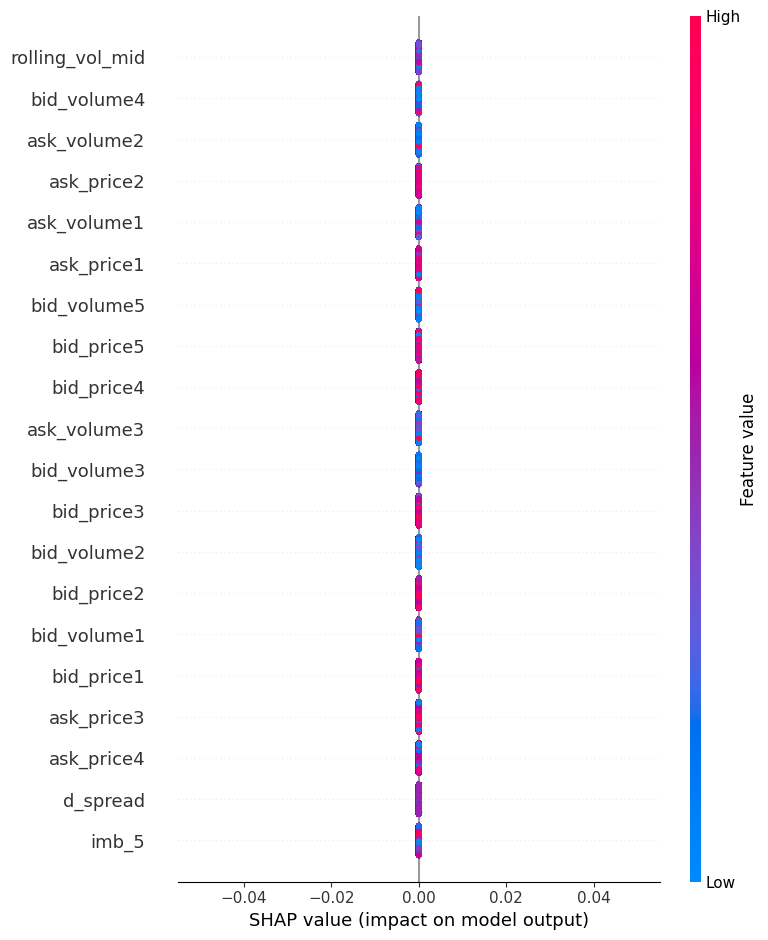

In [32]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model, X_test)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)


# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [8]:
y_val_pred = xgb_model.predict(X_val_scaled)
# Convert predictions to pandas Series to match y_val format
y_val_pred = pd.Series(y_val_pred, index=y_val.index, name='predicted_label')
# Calculate Pearson correlation between actual and predicted values
pearson_corr, pearson_p = pearsonr(y_val, y_val_pred)

print(f"Pearson correlation between actual and predicted validation values: {pearson_corr:.6f}")
print(f"P-value: {pearson_p:.6e}")

# Additional metrics for context
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f"Mean Squared Error: {mse:.8f}")
print(f"R² Score: {r2:.6f}")

Pearson correlation between actual and predicted validation values: 0.659773
P-value: 0.000000e+00
Mean Squared Error: 0.00000000
R² Score: 0.432935


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [30]:
testingdf = pd.read_csv("gq-implied-volatility-forecasting/test/ETH.csv")
testingdf["spread"] = testingdf["ask_price1"] - testingdf["bid_price1"]

# Imbalances
for d in range(1,6):
    testingdf[f"imb_{d}"] = (testingdf[f"bid_volume{d}"] - testingdf[f"ask_volume{d}"]) / \
                     (testingdf[f"bid_volume{d}"] + testingdf[f"ask_volume{d}"])

# Cumulative
testingdf["cum_bid_vol"] = sum(testingdf[f"bid_volume{d}"] for d in range(1,6))
testingdf["cum_ask_vol"] = sum(testingdf[f"ask_volume{d}"] for d in range(1,6))
testingdf["cum_imb"] = (testingdf["cum_bid_vol"] - testingdf["cum_ask_vol"]) / \
                (testingdf["cum_bid_vol"] + testingdf["cum_ask_vol"])

# VWAP
testingdf["vwap_bid"] = sum(testingdf[f"bid_price{d}"]*testingdf[f"bid_volume{d}"] for d in range(1,6)) / testingdf["cum_bid_vol"]
testingdf["vwap_ask"] = sum(testingdf[f"ask_price{d}"]*testingdf[f"ask_volume{d}"] for d in range(1,6)) / testingdf["cum_ask_vol"]

# Temporal changes
# Calculate time differences to identify consecutive seconds
#testingdf['timestamp'] = pd.to_datetime(testingdf['timestamp'])
#testingdf['time_diff'] = testingdf['timestamp'].diff()

# Only calculate diff when time difference is 1 second, otherwise NaN
testingdf["d_mid"] = testingdf["mid_price"].diff(1)
testingdf["d_spread"] = testingdf["spread"].diff(1)
# Calculate rolling standard deviation only for consecutive seconds
# Create a helper to identify consecutive groups
#consecutive_groups = (testingdf['time_diff'] != 1).cumsum()

# For each group, calculate rolling std only if we have enough consecutive values
'''def rolling_std_consecutive(group):
    if len(group) >= 10:
        return group['mid_price'].rolling(10, min_periods=1).std()
    else:
        return group['mid_price'].rolling(len(group), min_periods=1).std()'''

testingdf['rolling_vol_mid'] = testingdf['mid_price'].rolling(window=10).std()

In [9]:
predictionvalues = xgb_model.predict(testingdf.drop(columns=['timestamp']))

In [12]:
print(testingdf.dtypes)

timestamp          datetime64[ns]
mid_price                 float64
bid_price1                float64
bid_volume1               float64
bid_price2                float64
bid_volume2               float64
bid_price3                float64
bid_volume3               float64
bid_price4                float64
bid_volume4               float64
bid_price5                float64
bid_volume5               float64
ask_price1                float64
ask_volume1               float64
ask_price2                float64
ask_volume2               float64
ask_price3                float64
ask_volume3               float64
ask_price4                float64
ask_volume4               float64
ask_price5                float64
ask_volume5               float64
spread                    float64
imb_1                     float64
imb_2                     float64
imb_3                     float64
imb_4                     float64
imb_5                     float64
cum_bid_vol               float64
cum_ask_vol   

In [10]:
# Create a DataFrame with timestamp as index and predicted values
result_df = pd.DataFrame({
    'timestamp': range(1,len(predictionvalues)+1),
    'labels': predictionvalues
})

# Save to CSV
result_df.to_csv('y_val_pred_predictions.csv', index=False)
print("Predictions saved to 'y_val_pred_predictions.csv'")

Predictions saved to 'y_val_pred_predictions.csv'


In [22]:
y_val_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [17]:
df1 = pd.read_csv("y_val_pred_predictions.csv")["labels"].head(1000)
df2 = pd.read_csv('gq-implied-volatility-forecasting/submission.csv')["labels"].head(1000)
pearson_corr = pearsonr(df1*10e3, df2)[0]
print(f"Pearson correlation between df1 and df2: {pearson_corr:.6f}")

Pearson correlation between df1 and df2: -0.026445


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [14]:
import matplotlib.pyplot as plt

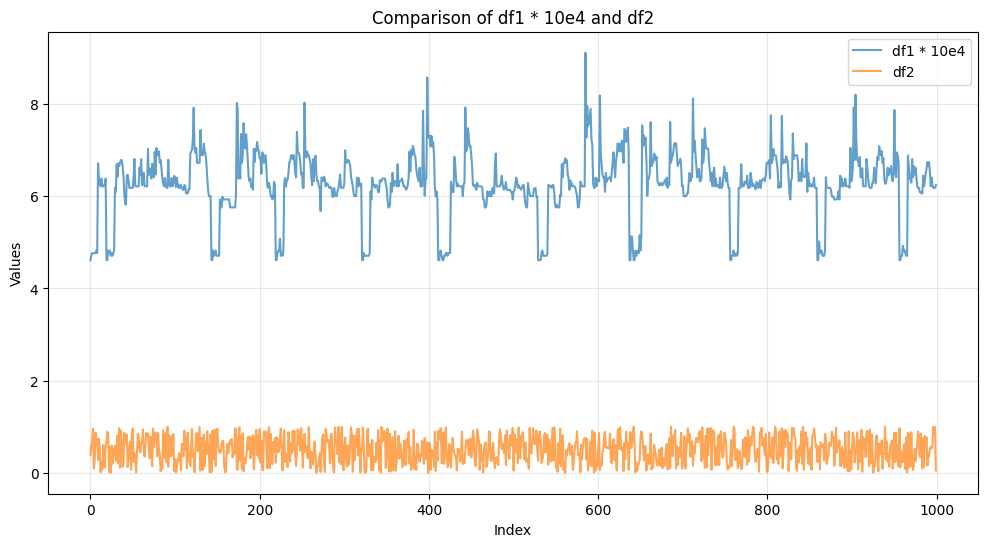

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df1*10e4, label='df1 * 10e4', alpha=0.7)
plt.plot(df2, label='df2', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of df1 * 10e4 and df2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Check for common issues that might cause errors

# 1. Check for NaN values in your data
print("NaN values in testingdf:")
print(testingdf.isnull().sum())

# 2. Check data types
print("\nData types in testingdf:")
print(testingdf.dtypes)

# 3. Check if all required columns are present
print(f"\nRequired features: {len(featured_cols)}")
print(f"Available columns in testingdf: {len(testingdf.columns)}")
print(f"Missing columns: {set(featured_cols) - set(testingdf.columns)}")

# 4. Handle missing values before prediction
testingdf_clean = testingdf.dropna()
print(f"\nShape before cleaning: {testingdf.shape}")
print(f"Shape after cleaning: {testingdf_clean.shape}")

# 5. Make predictions with cleaned data
try:
    predictions = xgb_model.predict(testingdf_clean[featured_cols])
    print(f"Predictions shape: {predictions.shape}")
except Exception as e:
    print(f"Error during prediction: {e}")

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from scipy.stats import randint, uniform, pearsonr

# --------------------------
# Example: load your data
# X = ...
# y = ...
# --------------------------

# --- Chronological train-test split (e.g., 80% / 20%) ---

X = df_checked.drop(columns=['timestamp', 'label', 'time_diff'])
y = df_checked['label']
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train_full, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train_full, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# --- Pearson correlation scorer ---
def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

# --- Base model ---
xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

# --- Hyperparameter search space ---
param_dist = {
    "n_estimators": randint(200, 1000),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "min_child_weight": randint(1, 10),
    "gamma": uniform(0, 1),
    "reg_alpha": uniform(0, 1),
}

# --- Cross-validation setup: chronological folds ---
cv = TimeSeriesSplit(n_splits=5)

# --- Randomized hyperparameter search with CV ---
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=pearson_scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# --- Hyperparameter tuning ---
search.fit(X_train_scaled, y_train_full)

print("Best hyperparameters:", search.best_params_)
print("Best CV Pearson:", search.best_score_)

# --- Final evaluation on held-out test set ---
best_model = search.best_estimator_
best_model.fit(X_train_scaled, y_train_full)
y_pred = best_model.predict(X_test_scaled)
test_corr = pearson_corr(y_test, y_pred)

print("Test Pearson:", test_corr)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/2085958331.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)
/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/2085958331.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)
/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/2085958331.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/Library/Frameworks/Python.framework/Versions/3

Best hyperparameters: {'colsample_bytree': np.float64(0.749816047538945), 'gamma': np.float64(0.9507143064099162), 'learning_rate': np.float64(0.15639878836228102), 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 814, 'reg_alpha': np.float64(0.44583275285359114), 'subsample': np.float64(0.6399899663272012)}
Best CV Pearson: nan
Test Pearson: nan


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/2085958331.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y_true, y_pred)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [27]:
best_model.fit(X_train_scaled, y_train_full)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.749816047538945)
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
pearson_corr = pearsonr(y_test, best_model.predict(X_test))[0]

/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/304298291.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr = pearsonr(y_test, best_model.predict(X_test))[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [29]:
import pickle

# Save the trained XGBoost model to a pickle file
with open('xgb_model2.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [31]:
predictionvalues2 = best_model.predict(testingdf.drop(columns=['timestamp']))

In [ ]:
best_model.fit(X_train_scaled, y_train_full)


In [6]:
X = df_checked.drop(columns=['timestamp', 'label', 'time_diff'])
y = df_checked['label']
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]    


In [8]:
import pickle

# Load the XGBoost model from the pickle file
with open('xgb_model2.pkl', 'rb') as f:
    xgb_model2 = pickle.load(f)

# Fit the loaded model to X_train and y_train
xgb_model2.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.749816047538945)
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Pearson correlation (xgb_model2, y_test): nan
P-value: nan


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/1488851569.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr2, pearson_p2 = pearsonr(y_test, y_test_pred2)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [35]:
X = df_checked.drop(columns=['timestamp', 'label', 'time_diff'])
y = df_checked['label']
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]  





xgb_modelnew = xgb.XGBRegressor(
    colsample_bytree=0.7498,
    gamma=4.7536,
    learning_rate=0.1564,
    max_depth=6,
    min_child_weight=5,
    n_estimators=814,
    reg_alpha=0.4458,
    reg_lambda=0.4999,
    subsample=0.7837,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)
xgb_modelnew.fit(X_train, y_train)


KeyError: "['time_diff'] not found in axis"

In [12]:
print(df_checked[df_checked['timestamp'] == pd.to_datetime('2024-10-02 21:11:42')])

                 timestamp     mid_price     bid_price1    bid_volume1  \
615494 2024-10-02 21:11:42  2.495401e+39  8.174810e-320 -6.092531e-278   

           bid_price2    bid_volume2     bid_price3    bid_volume3  \
615494 -2.353437e-185 -7.897725e-278  8.390304e+246 -2.978571e-277   

           bid_price4    bid_volume4  ...  imb_5    cum_bid_vol  \
615494  8.390304e+246 -3.700648e-277  ...   -1.0 -1.529902e-276   

          cum_ask_vol  cum_imb       vwap_bid      vwap_ask  time_diff  \
615494  2.081807e+112     -1.0  3.663024e+246  4.990803e+39        1.0   

               d_mid      d_spread  rolling_vol_mid  
615494  1.247701e+39  2.495401e+39     8.421338e+38  

[1 rows x 38 columns]


In [19]:
pearson_corr = pearsonr(y_test, xgb_modelnew.predict(X_test))[0]
print(f"Pearson correlation between actual and predicted test values: {pearson_corr:.6f}")

Pearson correlation between actual and predicted test values: nan


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/1948061310.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr = pearsonr(y_test, xgb_modelnew.predict(X_test))[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [34]:
import numpy as np
import pandas as pd
def mad_based_outlier_flags(df, threshold=100):
    """
    Flags rows in a DataFrame as outliers if ANY value in the row
    is an outlier based on Median Absolute Deviation (MAD).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame (numeric only or mixed).
        threshold (float): Z-score cutoff for outliers (default 10).
        
    Returns:
        pd.DataFrame: Original DataFrame with an added column 'is_outlier'.
    """
    # Ensure numeric data only
    numeric_df = df[['ask_price1', 'bid_price1','ask_price2','ask_price2', 'bid_price3','ask_price3', 'bid_price4','ask_price4', 'bid_price5','ask_price5']]  # Adjust columns as needed

    # Compute row-wise medians
    row_median = numeric_df.median(axis=1)
    
    # Compute MAD for each row
    mad = (numeric_df.sub(row_median, axis=0).abs()).median(axis=1)
    
    # Compute modified z-scores for each element
    modified_z = 0.6745 * (numeric_df.sub(row_median, axis=0).abs()).div(mad, axis=0)
    
    # Flag a row if ANY value in that row exceeds threshold
    row_flags = (modified_z > threshold).any(axis=1)
    print(row_flags.value_counts())
    # Attach result
    df = df.copy()
    df["is_outlier"] = row_flags
    # Set all columns except timestamp to NaN where is_outlier is True
    return df


df = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["label"] = df["label"].replace(0.0, np.nan)

df_checked = mad_based_outlier_flags(df.copy(), threshold=100)

# Identify which columns to modify (all except timestamp and is_outlier)
cols_to_modify = df_checked.columns.difference(['timestamp', 'is_outlier'])

# Set outlier rows to NaN
df_checked.loc[df_checked["is_outlier"], cols_to_modify] = np.nan

# Interpolate missing values
df_checked[cols_to_modify] = df_checked[cols_to_modify].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)

# Finally drop the helper column
df_checked = df_checked.drop(columns=['is_outlier'])

# Drop rows still containing NaN (if interpolation failed)
df_checked = df_checked.dropna()


False    631291
True          1
Name: count, dtype: int64


In [36]:
df_checked["spread"] = df_checked["ask_price1"] - df_checked["bid_price1"]

# Imbalances
for d in range(1,6):
    df_checked[f"imb_{d}"] = (df_checked[f"bid_volume{d}"] - df_checked[f"ask_volume{d}"]) / \
                     (df_checked[f"bid_volume{d}"] + df_checked[f"ask_volume{d}"])

# Cumulative
df_checked["cum_bid_vol"] = sum(df_checked[f"bid_volume{d}"] for d in range(1,6))
df_checked["cum_ask_vol"] = sum(df_checked[f"ask_volume{d}"] for d in range(1,6))
df_checked["cum_imb"] = (df_checked["cum_bid_vol"] - df_checked["cum_ask_vol"]) / \
                (df_checked["cum_bid_vol"] + df_checked["cum_ask_vol"])

# VWAP
df_checked["vwap_bid"] = sum(df_checked[f"bid_price{d}"]*df_checked[f"bid_volume{d}"] for d in range(1,6)) / df_checked["cum_bid_vol"]
df_checked["vwap_ask"] = sum(df_checked[f"ask_price{d}"]*df_checked[f"ask_volume{d}"] for d in range(1,6)) / df_checked["cum_ask_vol"]

# Temporal changes
# Calculate time differences to identify consecutive seconds
df_checked['time_diff'] = df_checked['timestamp'].diff().dt.total_seconds()

# Only calculate diff when time difference is 1 second, otherwise NaN
df_checked["d_mid"] = df_checked["mid_price"].diff(1).where(df_checked['time_diff'] == 1)
df_checked["d_spread"] = df_checked["spread"].diff(1).where(df_checked['time_diff'] == 1)
# Calculate rolling standard deviation only for consecutive seconds
# Create a helper to identify consecutive groups
consecutive_groups = (df_checked['time_diff'] != 1).cumsum()

# For each group, calculate rolling std only if we have enough consecutive values
def rolling_std_consecutive(group):
    if len(group) >= 10:
        return group['mid_price'].rolling(10, min_periods=1).std()
    else:
        return group['mid_price'].rolling(len(group), min_periods=1).std()

df_checked["rolling_vol_mid"] = df_checked.groupby(consecutive_groups).apply(rolling_std_consecutive).reset_index(level=0, drop=True)

In [ ]:
import xgboost as xgb

X = df_checked.drop(columns=['timestamp', 'label', 'time_diff'])
y = df_checked['label']
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]  





xgb_modelnew1 = xgb.XGBRegressor(
    colsample_bytree=0.7498,
    learning_rate=0.1564,
    max_depth=6,
    min_child_weight=5,
    n_estimators=814,
    reg_alpha=0.4458,
    reg_lambda=0.4999,
    subsample=0.7837,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)
xgb_modelnew1.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7498
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [47]:
pearson_corr = pearsonr(y_test, xgb_modelnew1.predict(X_test))[0]
print(f"Pearson correlation between actual and predicted test values: {pearson_corr:.6f}")

Pearson correlation between actual and predicted test values: nan


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_93461/3238765220.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr = pearsonr(y_test, xgb_modelnew1.predict(X_test))[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)
